In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Model
from keras import layers

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

**Data Normalization**

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)

**Creating Model**

In [ ]:
My_Input = layers.Input(shape=(28, 28, 1))
conv_1 = layers.Conv2D(16, 3, activation="relu", padding="same", strides=2)(My_Input)
conv_2 = layers.Conv2D(32, 3, activation="relu", padding="same")(conv_1)
flat = layers.Flatten()(conv_2)
out_layer = layers.Dense(10, activation="softmax")(flat)
MyModel = Model(My_Input, out_layer)

In [ ]:
MyModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 67,530
Trainable params: 67,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MyModel.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

**Model Training**

In [ ]:
Network_history = MyModel.fit(X_train, Y_train, batch_size=128, epochs=25, validation_split=0.02)

Epoch 1/25
460/460 [==============================] - 41s 87ms/step - loss: 0.3143 - accuracy: 0.9118 - val_loss: 0.1196 - val_accuracy: 0.9775
Epoch 2/25
460/460 [==============================] - 20s 44ms/step - loss: 0.0918 - accuracy: 0.9727 - val_loss: 0.0956 - val_accuracy: 0.9783
Epoch 3/25
460/460 [==============================] - 19s 41ms/step - loss: 0.0644 - accuracy: 0.9814 - val_loss: 0.0883 - val_accuracy: 0.9850
Epoch 4/25
460/460 [==============================] - 20s 44ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0739 - val_accuracy: 0.9892
Epoch 5/25
460/460 [==============================] - 20s 43ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0820 - val_accuracy: 0.9883
Epoch 6/25
460/460 [==============================] - 21s 45ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0713 - val_accuracy: 0.9883
Epoch 7/25
460/460 [==============================] - 21s 45ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0782 - val_accuracy:

In [ ]:
history = Network_history.history

In [ ]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses = history["loss"]
accuracies = history["accuracy"]
val_loss = history["val_loss"]
val_accuracy = history["val_accuracy"]

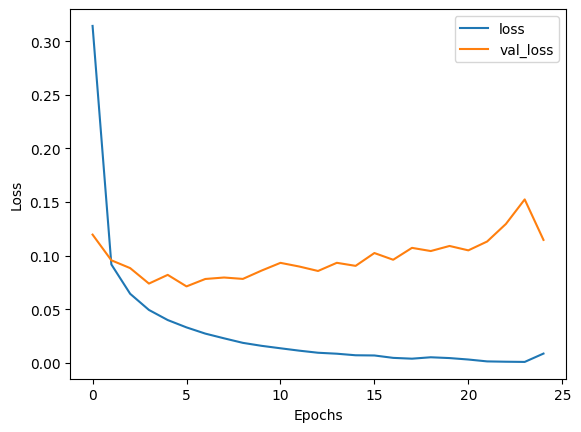

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(losses)
plt.plot(val_loss)
plt.legend(["loss", "val_loss"])

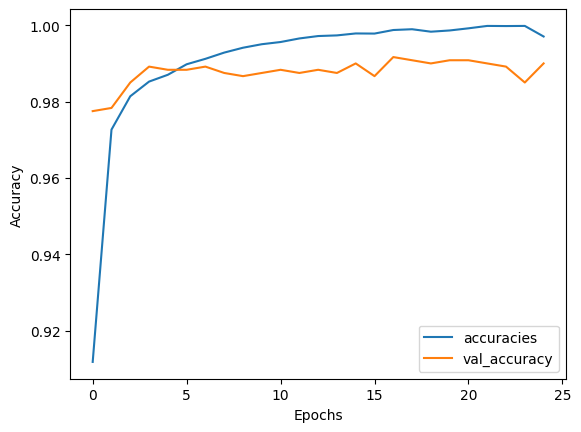

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(accuracies)
plt.plot(val_accuracy)
plt.legend(["accuracies", "val_accuracy"])

In [ ]:
test_loss , test_accuracy = MyModel.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9852


In [ ]:
test_label_predict = MyModel.predict(X_test)
test_label_predict = np.argmax(test_label_predict, axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
MyModel.layers[0].get_config()

{'batch_input_shape': (None, 28, 28, 1),
 'dtype': 'float32',
 'sparse': False,
 'ragged': False,
 'name': 'input_1'}